<a href="https://colab.research.google.com/github/Diegougarcia/Evidencias-de-tareas/blob/main/Evidencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poblacion del Mundo
# Diego Garcia A01198210


Description of the data base:

Below is a list of countries sortable by their population - 2020. There are 235 countries along with their population. And there are 11 columns, each of which represents different characteristics of the countries. This database includes factors such as annual population change, net change, population density, area in square kilometers, migrants, fertility rate, median age (Age median or average age) lifespan of the country and the urban population.  

Description of variables: 

- Population (2020): This columns contains the population of different countries, it is a numerical variable. 
- Net Change: This columns contains the net change of the population, it is a numerical variable	
- Density (P/Km²): The column contains the density of the population, it is a numerical variable	
- Land Area (Km²): This column contain the land area in terms of kilometer square, it is a numerical variable
- Migrants (net): This column represents the migrants of the countries, it is a categorical variable
- Fert. Rate:	This column represents the fertility or the growth rate of individual countries, it is a numerical variable
- Med. Age:	This column represents the median age (Middle Age or the average age) lifespan of the country, it is a numerical variable.
- Urban Pop %: This column represents the urban population, it is a numerical variable 
- World Share: This column represents the population contributed to the world's share by individual country, it is a numerical variable

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

df= pd.read_csv('https://raw.githubusercontent.com/Diegougarcia/Dataset/main/population_by_country_2020.csv')
df.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


1. What are the top ten countries with the most population (visual representation, Pie Chart)?


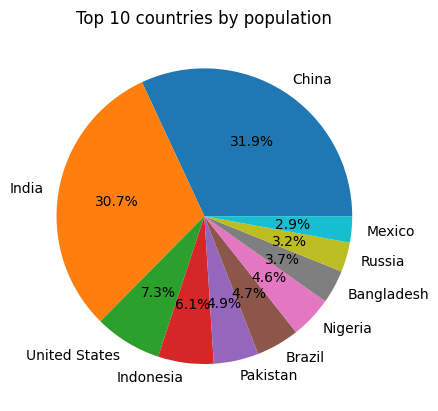

In [98]:
df= df.sort_values('Population (2020)', ascending=False)
countries = df.head(10)
plt.pie(countries['Population (2020)'], labels=countries['Country (or dependency)'], 
        autopct='%1.1f%%')
plt.title('Top 10 countries by population')
plt.show()

Conclusion: We can conclude that of the countries with the largest population, India and China take up a large part of that space. The pie chart allows us to see that, including the relationship in population between the other 8 countries. 

2. What are the countries with the most net change (visual representation,line plot)?

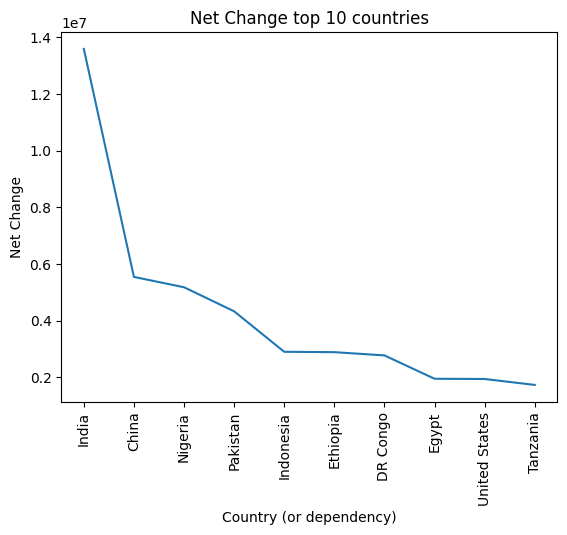

In [139]:
netchange= df.sort_values('Net Change', ascending=False).head(10)
plt.plot(netchange['Country (or dependency)'], 
         netchange['Net Change'])

plt.xlabel('Country (or dependency)')
plt.ylabel('Net Change')
plt.title('Net Change top 10 countries')
plt.xticks(rotation=90)
plt.show()

Conclusion: From the chart above we can observe how the top ten countries with the most net change compare to one another.  

3. Show a visual representation of the Net Change of the top ten most populated countries (barh plot). 

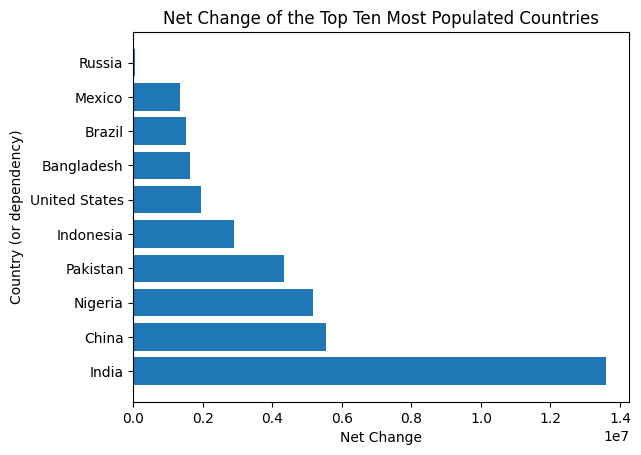

In [140]:
netchange= df.sort_values(by='Population (2020)', ascending=False).head(10)
netchange = netchange.sort_values(by='Net Change', ascending=False)

fig, ax = plt.subplots()
ax.barh(netchange['Country (or dependency)'], 
        netchange['Net Change'])
ax.set_xlabel('Net Change')
ax.set_ylabel('Country (or dependency)')
ax.set_title('Net Change of the Top Ten Most Populated Countries')
plt.show()

Conclusion: In the barh plot above we can observe the net change of the top ten most populated countries. China is the most populated country and this graph show us that even if its the most populated country , India significantly surpasses Chinas net change of the population. Another conclusion we can draw from this question is that Nigeria being small in comparison to China’s and the United States population has a net change slightly less than China’s, but a net change more than double of the Unided States.  

4. What is the population of China without taking into account migrants? 

In [95]:
china = df[df['Country (or dependency)'] == 'China']
population= china['Population (2020)'] - china['Migrants (net)']
print("", population.item())

 1440646224.0


Conclusion: From this result we can see what the population of China looks like without migrants, we can draw the conclusion that migrants cause a significant change in China’s population. 

5. How does the land area of the 2 most populated countries compare?

6415021.00


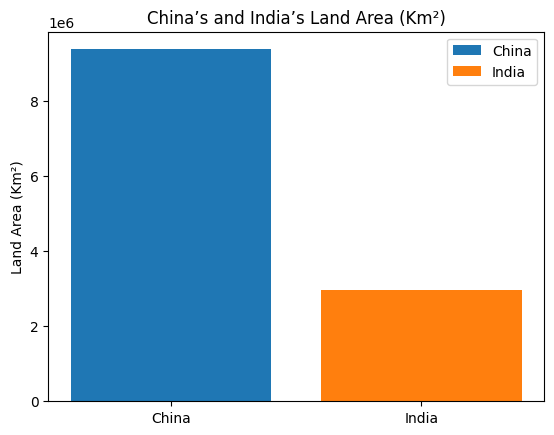

In [141]:
china = df[df['Country (or dependency)'] == 'China']
india = df[df['Country (or dependency)'] == 'India']

fig, ax = plt.subplots()
ax.bar('China', china['Land Area (Km²)'], 
       label='China')
ax.bar('India', india['Land Area (Km²)'], 
       label='India')
ax.set_ylabel('Land Area (Km²)')
ax.set_title('China’s and India’s Land Area (Km²)')
ax.legend()
landarea= china['Land Area (Km²)'].iloc[0] - india['Land Area (Km²)'].iloc[0]
print(f"{landarea:.2f}")

Conclusion: The pie chart in the first question showed us that China and India are the two most populated countries. When comparing the land area between both countries, we expect them two have a slightly smiliar land area but this wasn’t the case for China and India. India has a way smaller land area than China, even if they share an almost similar population. We can conclude that land area isn’t a significant factor in population size. 

6. What is the Pearson correlation coefficient between Land Area (Km²) and Density (P/Km²)? 

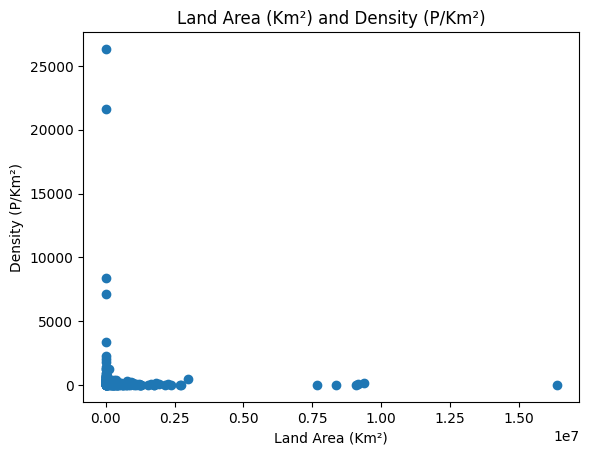

 -0.05876596302045471


In [142]:
corr = df["Land Area (Km²)"].corr(df["Density (P/Km²)"])

plt.scatter(df["Land Area (Km²)"], 
            df["Density (P/Km²)"])
plt.xlabel("Land Area (Km²)")
plt.ylabel("Density (P/Km²)")
plt.title("Land Area (Km²) and Density (P/Km²)")
plt.show()
print("", corr)

Conclusion: This question provides us with the relationship between both numerial variables, Land Area and Density. To understand their relationship we have to find the Pearson correlation coefficient between both variables. The scatter plot also shows us the relationship in a visual representation.  

7. Now that you found the correlation coefficient, make a regression model and a regression plot of Land Area and Density.

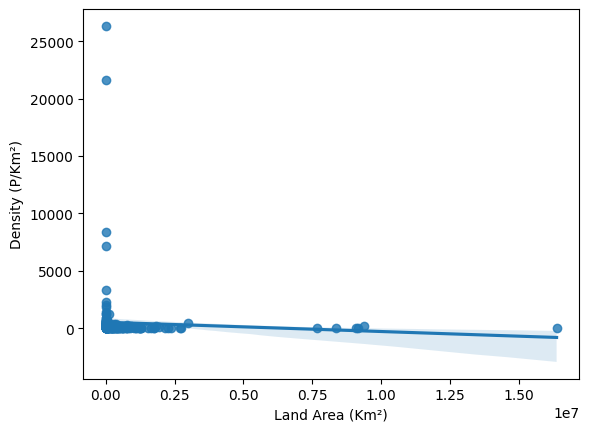

                            OLS Regression Results                            
Dep. Variable:        Density (P/Km²)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8074
Date:                Sat, 06 May 2023   Prob (F-statistic):              0.370
Time:                        05:06:57   Log-Likelihood:                -2154.8
No. Observations:                 235   AIC:                             4314.
Df Residuals:                     233   BIC:                             4320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             520.7059    160.147     

In [143]:
x = df["Land Area (Km²)"]
y = df["Density (P/Km²)"]
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()

sns.regplot(x=x["Land Area (Km²)"],
            y=y)
plt.xlabel("Land Area (Km²)")
plt.ylabel("Density (P/Km²)")
plt.show()
print(results.summary())

Conclusion: After first analyzing the relatioinship between both numerical variables finding the Pearson correlation coefficient, we go more into detail in the regression model. This results summarizes the complete regression model between Land Area and Density. 

**Final Conclusion:**

Ultimately this set of data provides us with the data of the most populated contries in the world, I used the material learned in class to create different graphs and a regression model to represet the various variables the data set contains in different ways.  